In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

from unidecode import unidecode

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
from mydataviz import *

In [3]:
# Chargement du dataset complet (317661, 26)
#data = pd.read_csv('./data/data_clean.csv', low_memory=False)

In [4]:
# Création d'un extrait du dataset pour charger et expérimenter plus rapidement
#data_petit = data.iloc[np.random.randint(0, len(data), 50000)]
#data_petit.to_csv("./data/data_clean_petit.csv")

In [5]:
# Chargement du dataset version réduite (50000 valeurs pour les tests)
data = pd.read_csv("./data/data_clean_petit.csv", low_memory=False)

In [6]:
print("Fichier de dimension " + str(data.shape) + " :\n")

print("\n\nType des colonnes :")
print(data.dtypes.to_markdown())

print("\n\nTaux de remplissage (%) :")
print(((1- data.isna().mean())*100).to_markdown())

print("\n\nNombre de valeurs uniques par colones :")
print(data.nunique().to_markdown())

Fichier de dimension (50000, 27) :



Type des colonnes :
|                                            | 0       |
|:-------------------------------------------|:--------|
| Unnamed: 0.1                               | int64   |
| Unnamed: 0                                 | int64   |
| code                                       | int64   |
| product_name                               | object  |
| image_url                                  | object  |
| categories                                 | object  |
| ingredients_text                           | object  |
| additives_n                                | float64 |
| additives                                  | object  |
| additives_tags                             | object  |
| ingredients_from_palm_oil_n                | float64 |
| ingredients_from_palm_oil_tags             | object  |
| ingredients_that_may_be_from_palm_oil_n    | float64 |
| ingredients_that_may_be_from_palm_oil_tags | object  |
| nutrition_grade_fr          

In [7]:
txt = ' '.join(data['product_name'].fillna(''))

In [8]:
tmp = DataSet.make_dataset(txt, 'txt')

In [9]:
wc = tmp.normalise().wordcloud(width=900, height=600, max_font_size=120)

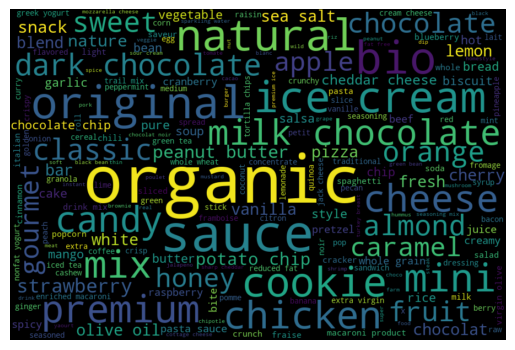

In [10]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

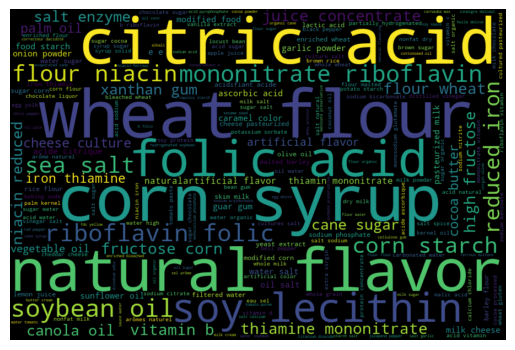

In [11]:
txt = ' '.join(data['ingredients_text'].fillna(''))

tmp = DataSet.make_dataset(txt, 'txt')

wc = tmp.normalise().wordcloud(width=900, height=600, max_font_size=120)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
data['categories'].value_counts()[:10]

One-dish meals           865
Biscuits and cakes       734
Sweets                   694
Cereals                  674
Non-sugared beverages    661
Cheese                   627
Processed meat           534
Dressings and sauces     527
Milk and yogurt          516
Alcoholic beverages      486
Name: categories, dtype: int64

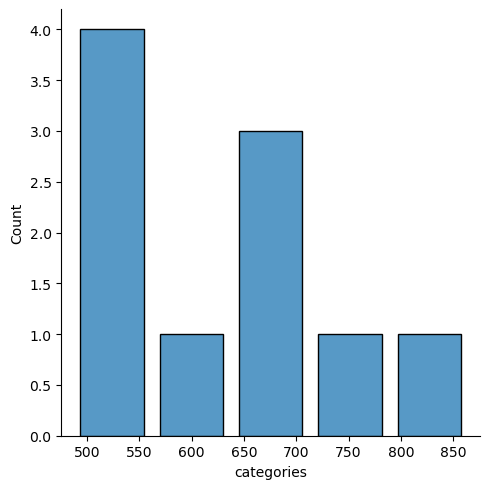

In [13]:
sns.displot(data['categories'].value_counts()[:10], shrink=.8)

In [14]:
tmp = data['categories'].value_counts()[:30]

In [15]:
def plot_piechart(data, limit=None):
    tmp = data.value_counts()
    
    if limit is not None:
        tmp = tmp[:limit]

    palette_color = sns.color_palette('bright')

    # plotting data on chart
    plt.pie(tmp.values, labels=tmp.index, colors=palette_color, autopct='%.0f%%')

    # displaying chart
    plt.show()


def plot_barchartcat(data, limit=None):
    tmp = data.value_counts()
    
    if limit is not None:
        tmp = tmp[:limit]

    print(tmp.values)
    print(list(tmp.index))
    sns.displot(tmp.values, x=list(tmp.index), kind="hist")

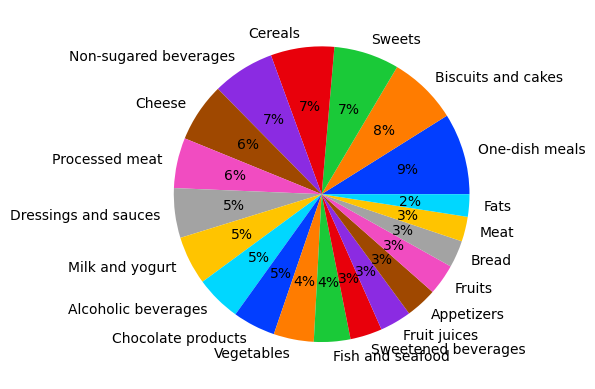

In [16]:
plot_piechart(data['categories'], limit=20)

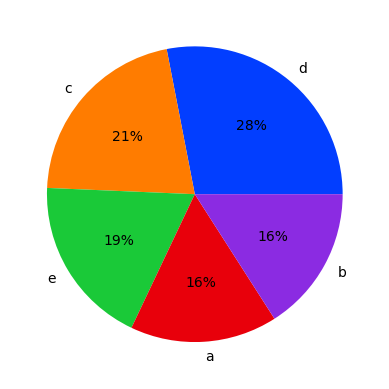

In [17]:
plot_piechart(data['nutrition_grade_fr'])

In [18]:
tmp = data['additives_tags'].str.split(',', expand = True).stack().str.replace('en:', '')
tmp

1      0      e375
       1      e101
2      0      e415
       1      e412
       2    e339ii
             ...  
49994  1      e450
       2      e461
49997  0      e201
49999  0      e300
       1      e450
Length: 75943, dtype: object

In [19]:
#tmp = data['nutrition_grade_fr']

<AxesSubplot: xlabel='index', ylabel='value'>

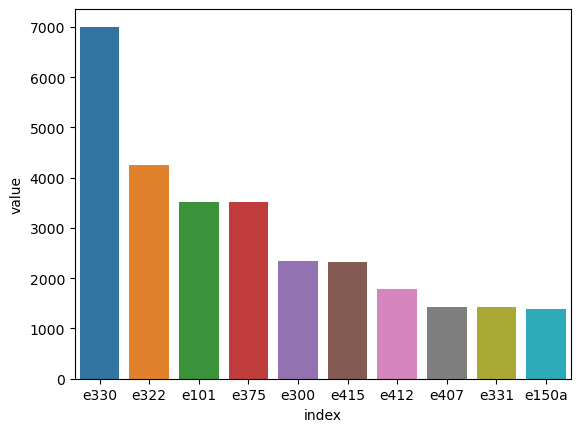

In [20]:
df = tmp.value_counts()[:10]

df2 = pd.melt(df.reset_index(), id_vars=["index"])

sns.barplot(data=df2, x="index", y="value")

In [21]:
df = data[['fat_100g', 'proteins_100g']]

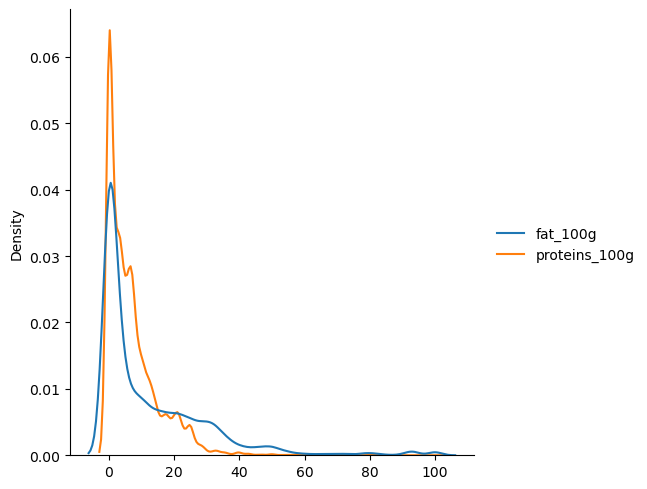

In [22]:
sns.displot(data=df, kind='kde')